In [2]:
%matplotlib inline

In [9]:
from sklearn import metrics
import joblib
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('muted')

In [24]:
from network import Network

SyntaxError: invalid syntax (network.py, line 199)

In [62]:
def roc(lang):
    error = joblib.load('pickles/%s_break' % lang)
    boundaries = joblib.load('pickles/%s_boundaries' % lang)
    fpr, tpr, _ = metrics.roc_curve(boundaries, error)

    return {'lang': lang, 'fpr': fpr, 'tpr': tpr, 'auc': metrics.auc(fpr, tpr)}

df = pd.DataFrame(list(map(roc, ['0english', '3english', '0danish', '3danish'])))
for i, row in df.iterrows():
    print(row.lang)

0english
3english
0danish
3danish


In [60]:
def roc_plot(df):
    ax = plt.subplot(1,1,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    for i, row in df.iterrows():
        plt.plot(row.fpr, row.tpr, label='{0} (area = {1:0.2f})'
                 .format(row.lang, row.auc))

    # Sort labels in legend.
    handles, labels = ax.get_legend_handles_labels()
    def get_aoc(handle_label):
        label = handle_label[1]
        return float(label[-5:-1])
    hl = sorted(zip(handles, labels), key=get_aoc, reverse=True)
    handles2, labels2 = zip(*hl)
    ax.legend(handles2, labels2, loc=4, frameon=True)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.gcf().set_size_inches(4, 4)

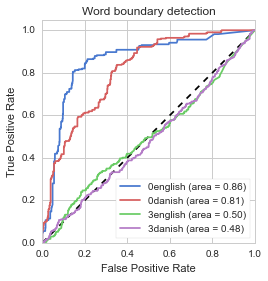

In [63]:
roc_plot(df)
plt.title('Word boundary detection')
plt.savefig('roc.pdf')